<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2004-2%20-%20%ED%99%95%EB%A5%A0%EC%A0%81%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
이전 장의 럭키백 문제(로지스틱 회귀)를 해결했다.
이번 장에서는 새로운 종류(클래스)의 수산물 샘플을 추가하고자 한다.
그러나 어떤 생선이 먼저 오고, 언제 도착할지 몰라 즉시 훈련 데이터를 준비할 수 없다는 새로운 문제에 봉착했다.(P)
이를 어떻게 해결할 수 있을까?
경사 하강법 알고리즘을 통해 대량의 데이터에서 분류 모델을 훈련하는 방법을 사용함으로써 이 문제를 해결하고자 한다.(S)
즉 이전에 학습한 데이터를 유지하고 새로운 데이터에 대해서만 추가로 학습(업데이트)하는 방법이다.
이를 "점진적 학습" 또는 "온라인 학습"이라고 부른다.
대표적인 점진적 학습 알고리즘은 "확률적 경사 하강법(Stochastic Gradient Descent)"이라고 한다.
사이킷런에서 이를 위한 클래스를 제공하는데, 이를 사용하기 전에 어떤 알고리즘인지, 또 왜 중요한지에 대해 배울 예정이다.

키워드 = [확률적 경사 하강법, 손실 함수, 에포크]

핵심 패키지 및 함수 = [
  SGDClassifier: 확률적 경사 하강법을 사용한 분류 모델 생성 /
  SGDRegressor: 확률적 경사 하강법을 사용한 회귀 모델 생성]
  (둘 다 loss 매개변수에서 손실 함수를 지정할 수 있다.) /
  max_iter: 에포크 횟수를 지정하는 매개변수이며 기본값은 1000이다.
  tol: 반복을 멈출 조건을 설정하는 매개변수
  penalty: 규제의 종류를 지정하는 매개변수이며 기본값은 L2규제를 의미하는 'l2'이다.
  partial_fit(): 기존 모델을 이어서 훈련할 때 사용하는 메서드(기존 학습의 가중치, 절편 유지)
'''

'\n이전 장의 럭키백 문제(로지스틱 회귀)를 해결했다.\n이번 장에서는 새로운 종류(클래스)의 수산물 샘플을 추가하고자 한다.\n그러나 어떤 생선이 먼저 오고, 언제 도착할지 몰라 즉시 훈련 데이터를 준비할 수 없다는 새로운 문제에 봉착했다.(P)\n이를 어떻게 해결할 수 있을까?\n경사 하강법 알고리즘을 통해 대량의 데이터에서 분류 모델을 훈련하는 방법을 사용함으로써 이 문제를 해결하고자 한다.(S)\n즉 이전에 학습한 데이터를 유지하고 새로운 데이터에 대해서만 추가로 학습(업데이트)하는 방법이다.\n이를 "점진적 학습" 또는 "온라인 학습"이라고 부른다.\n대표적인 점진적 학습 알고리즘은 "확률적 경사 하강법(Stochastic Gradient Descent)"이라고 한다.\n사이킷런에서 이를 위한 클래스를 제공하는데, 이를 사용하기 전에 어떤 알고리즘인지, 또 왜 중요한지에 대해 배울 예정이다.\n\n키워드 = [확률적 경사 하강법, 손실 함수, 에포크]\n\n핵심 패키지 및 함수 = [\n  SGDClassifier: 확률적 경사 하강법을 사용한 분류 모델 생성 /\n  SGDRegressor: 확률적 경사 하강법을 사용한 회귀 모델 생성]\n  (둘 다 loss 매개변수에서 손실 함수를 지정할 수 있다.) /\n  max_iter: 에포크 횟수를 지정하는 매개변수이며 기본값은 1000이다.\n  tol: 반복을 멈출 조건을 설정하는 매개변수\n  penalty: 규제의 종류를 지정하는 매개변수이며 기본값은 L2규제를 의미하는 \'l2\'이다.\n  partial_fit(): 기존 모델을 이어서 훈련할 때 사용하는 메서드(기존 학습의 가중치, 절편 유지)\n'

In [ ]:
'''
확률적이라는 말은 '무작위하게(randomly)'의 기술적인 표현이다.
경사는 '기울기'를 의미하며 하강법은 '내려가는 방법'이다.
산에서 원점으로 돌아오는 가장 빠른 방법은 경사가 가장 가파른 지점으로 내려오는 것이다.
즉 확률적 경사 하강법은 매우 점진적으로 경사가 가장 가파른 지점을 찾는 것이며(최적점을 찾기 위해),
이를 찾는 과정에서 여러 번의 반복이 수행된다.
랜덤한 한 개의 샘플로 최적점을 찾지 못하면 다시 처음부터(from scratch) 시작한다.
이러한 한 번의 반복을 "에포크(epoch)"라고 부른다.
중요한 것은 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 것이다.
그리고 최적의 길을 찾는 이 산은 "미분 가능"해야 한다. (연속적이어야 함)

전체 샘플에서 무작위로 1개의 샘플을 선택하는 것이 아닌, 몇 개의 샘플을 선택하는 "미니배치 경사 하강법"도 있다.
전체 샘플 모두를 사용하는 "배치 경사 하강법"도 존재한다.

신경망 알고리즘에서 이 확률적 경사 하강법을 꼭 사용한다.

그렇다면 가장 빠른 길을 찾아 내려가려 하는 이 산은 무엇일까?
바로 "손실 함수(loss function)"이다.
손실 함수는 쉽게 말해 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다.
당연하게도 이 값이 작으면 작을수록 좋다.
"비용 함수(cost function)"는 손실 함수의 다른 말로서, 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말한다.
보통은 이 둘을 엄격히 구분하지 않고 섞어서 사용한다.

분류에서 "손실"은 무엇을 의미할까?
정답(타깃값)을 못 맞히는 것이다.

로지스틱 회귀 모델을 통해 손실을 측정해 손실 함수를 만들 수 있다.
예를 들어, 타깃값이 1(양성 클래스)이고 로지스틱 회귀 모델을 통해 구한 예측 확률 값이 0.9라면
둘의 값을 곱한 다음 음수로 바꾸면 이 값이 손실 함수가 된다.(-0.9)
만약 타깃값이 0(음성 클래스)일 때는 어떻게 계산할까?
예측 확률이 어떤 값이든 0과 곱하면 0일 것이기 때문에
타깃을 마치 양성 클래스인 것처럼 1로 바꾼다.
대신 예측값 또한 양성 클래스에 대한 예측으로 바꾼다.
즉 1에서 예측값을 뺀 값을 새로운 예측값으로 사용하여, 1(음성-->양성 클래스로 바뀐 값)과 곱하여 음수를 취하는 것이다.
여기서 예측 확률에 로그 함수를 적용하면 더욱 좋다.
예측 확률의 범위는 0~1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다. (-log(p))
ex) 극단적인 예로 예측 확률이 1일 경우, log(예측 확률=1) == 자연상수 e에 몇 제곱을 해야 1이 되는가? == 0
왜 (양성 클래스에 대해) -log(p)라는 식으로 손실 함수 식을 간소화 할 수 있을까?
예측 확률이 0~1 사이에서 로그 함수(log(p))의 출력값은 음수를 출력할 것이다.
하지만 실제 손실 함수 값은 양수를 취해야 하기 때문에 마이너스 부호를 곱해(x축으로 대칭이동) 값을 구해야 한다.
따라서 -log(p)의 식이 도출된다.
음성 클래스의 경우에는 로그식이 -log(1-p)가 된다.

로그 함수의 그래프를 통해 이해한 바를 정리하자면, 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다고 볼 수 있다.
이러한 손실 함수를 "로지스틱 손실 함수(logistic loss function)"라고 부른다.
또는 "이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)"라고도 부른다.
다중 분류에서 사용하는 손실 함수는 "크로스엔트로피 손실 함수"라고 부른다.

회귀의 손실 함수로 3장에서 배운 평균 절댓값 오차를 사용할 수 있다.
타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값이며, 또는 "평균 제곱 오차(mean squared error)"를 많이 사용한다.
타깃에서 예측을 뺀 값은 제곱한 다음 모든 샘플에 평균한 값이다.
이 값이 작을수록 좋은 모델이다.
'''

'\n확률적이라는 말은 \'무작위하게(randomly)\'의 기술적인 표현이다.\n경사는 \'기울기\'를 의미하며 하강법은 \'내려가는 방법\'이다.\n산에서 원점으로 돌아오는 가장 빠른 방법은 경사가 가장 가파른 지점으로 내려오는 것이다.\n즉 확률적 경사 하강법은 매우 점진적으로 경사가 가장 가파른 지점을 찾는 것이며(최적점을 찾기 위해),\n이를 찾는 과정에서 여러 번의 반복이 수행된다.\n랜덤한 한 개의 샘플로 최적점을 찾지 못하면 다시 처음부터(from scratch) 시작한다.\n이러한 한 번의 반복을 "에포크(epoch)"라고 부른다.\n중요한 것은 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는 것이다.\n그리고 최적의 길을 찾는 이 산은 "미분 가능"해야 한다. (연속적이어야 함)\n\n전체 샘플에서 무작위로 1개의 샘플을 선택하는 것이 아닌, 몇 개의 샘플을 선택하는 "미니배치 경사 하강법"도 있다.\n전체 샘플 모두를 사용하는 "배치 경사 하강법"도 존재한다.\n\n신경망 알고리즘에서 이 확률적 경사 하강법을 꼭 사용한다.\n\n그렇다면 가장 빠른 길을 찾아 내려가려 하는 이 산은 무엇일까?\n바로 "손실 함수(loss function)"이다.\n손실 함수는 쉽게 말해 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다.\n당연하게도 이 값이 작으면 작을수록 좋다.\n"비용 함수(cost function)"는 손실 함수의 다른 말로서, 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말한다.\n보통은 이 둘을 엄격히 구분하지 않고 섞어서 사용한다.\n\n분류에서 "손실"은 무엇을 의미할까?\n정답(타깃값)을 못 맞히는 것이다.\n\n로지스틱 회귀 모델을 통해 손실을 측정해 손실 함수를 만들 수 있다.\n예를 들어, 타깃값이 1(양성 클래스)이고 로지스틱 회귀 모델을 통해 구한 예측 확률 값이 0.9라면\n둘의 값을 곱한 다음 음수로 바꾸면 이 값이 손실 함수가 된다.(-0.9)\n만

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


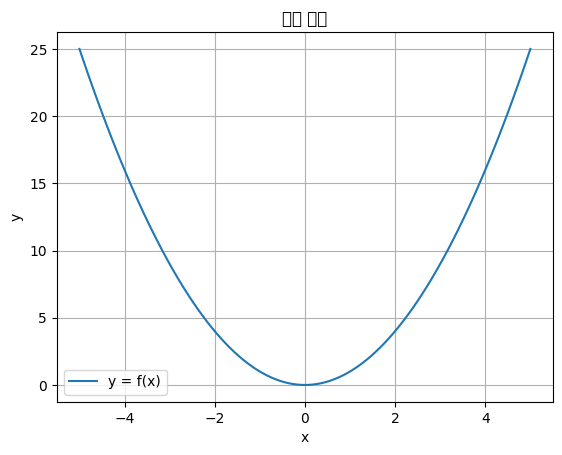

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

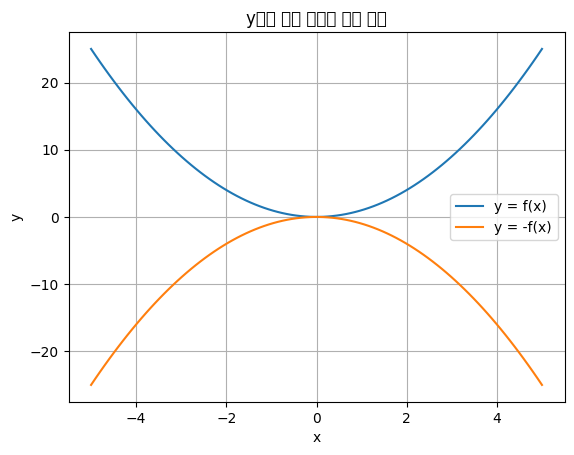

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = x**2  # 예시 함수: y = x^2

plt.plot(x, y, label='y = f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('원래 함수')
plt.grid(True)
plt.legend()
plt.show()


x = np.linspace(-5, 5, 100)
y = x**2  # 예시 함수: y = x^2
y_neg = -y  # y값에 음수 부호 붙이기

plt.plot(x, y, label='y = f(x)')
plt.plot(x, y_neg, label='y = -f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y값에 음수 부호를 붙인 함수')
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


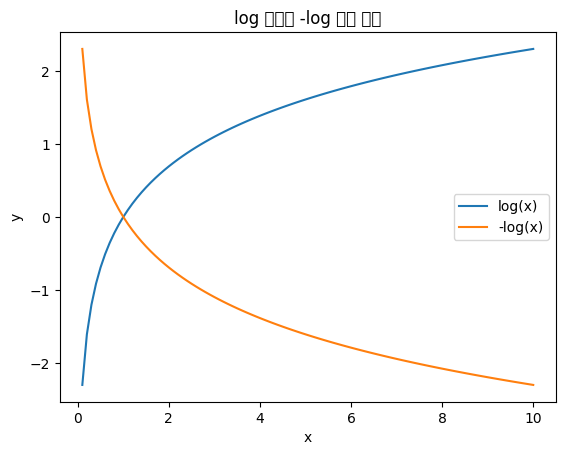

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1, 10, 100)
y1 = np.log(x)
y2 = -np.log(x)

plt.plot(x, y1, label='log(x)')
plt.plot(x, y2, label='-log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('log 함수와 -log 함수 비교')
plt.legend()
plt.show()

# -log 함수에서 x가 0에 가까울 수록 값이 무한대로 커지는 것을 알 수 있다.(손실 함수 값이 무한대로 증가)

In [ ]:
# 확률적 경사 하강법을 사용할 분류 모델 생성
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
# 'Species' 열을 제외한 나머지 5개는 입력 데이터로 사용 ('Species' 열은 타깃 데이터로)
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 타깃 데이터(예측값)는 항상 1차원 배열이어야 한다! --> 넘파이 변환시 1차원 배열로 입력

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # 훈련 세트에서 학습한 통계 값으로 테스트 테스도 변환해야할 것! (forstall 데이터 누출 및 성능 과대평가)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 경사 하강법을 사용하기 위해서는 기존 데이터와 동일한 스케일로 조정이 필요하다! (경사가 동일해야 하기에)

In [ ]:
# 사이킷런에서 제공하는 확률적 경사 하강법의 분류 클래스 임포트하기
from sklearn.linear_model import SGDClassifier

# 미니배치와, 배치 하강법은 제공하지 않음

In [ ]:
# SGDClassifier 객체 생성
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # max_iter 매개변수는 epoch와 동일함
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

'''
다중 분류일 경우, SGDClassifier에 loss='log_loss'를 지정하면 클래스마다 이진 분류 모델을 만든다.
즉 예를 들어 도미는 양성 클래스로 두고 나머지를 모두 음성 클래스로 두는 방식이다.
이러한 방식을 OVR(One Versus Rest)이라 부른다.

출력된 훈련 세트와 테스트 세트의 정확도가 낮은 것을 보아, 지정한 반복 횟수 10번이 부족한 것으로 판단됨
--> ConvergenceWarning
'''

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


"\n다중 분류일 경우, SGDClassifier에 loss='log'를 지정하면 클래스마다 이진 분류 모델을 만든다.\n즉 예를 들어 도미는 양성 클래스로 두고 나머지를 모두 음성 클래스로 두는 방식이다.\n이러한 방식을 OVR(One Versus Rest)이라 부른다.\n\n출력된 훈련 세트와 테스트 세트의 정확도가 낮은 것을 보아, 지정한 반복 횟수 10번이 부족한 것으로 판단됨\n--> ConvergenceWarning\n"

In [ ]:
# 방금 전까지 훈련한 모델을 유지하고, sc를 추가로 더 훈련
sc.partial_fit(train_scaled, train_target) # 모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용함

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

'''
partial_fit() 메서드를 호출할 때마다 1에포크씩 이어서 훈련함, 실행할수록 점수와 정확도가 향상된다.
그러나 얼마나 더 훈련해야할지에 대한 정확한 기준이 필요할 것으로 보임
'''

0.7983193277310925
0.775


'\npartial_fit() 메서드를 호출할 때마다 1에포크씩 이어서 훈련함, 실행할수록 점수와 정확도가 향상된다.\n그러나 얼마나 더 훈련해야할지에 대한 정확한 기준이 필요할 것으로 보임\n'

In [ ]:
'''
확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다!
왜 이런 현상일 일어날까?
적은 에포크 횟수는 과소적합을, 많은 에포크 횟수는 과대적합된 모델을 만들 가능성이 높다.
즉 훈련 세트점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다.
바로 이 순간이 모델이 과대적합되기 시작하는 지점이며,
과대적합기 시작하기 전에 훈련을 멈추는 것을 "조기 종료(early stopping)"라고 한다.
그래프를 통해 이 지점을 찾아보자.
'''

'\n확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다!\n왜 이런 현상일 일어날까?\n적은 에포크 횟수는 과소적합을, 많은 에포크 횟수는 과대적합된 모델을 만들 가능성이 높다.\n즉 훈련 세트점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다.\n바로 이 순간이 모델이 과대적합되기 시작하는 지점이며,\n과대적합기 시작하기 전에 훈련을 멈추는 것을 "조기 종료(early stopping)"라고 한다.\n그래프를 통해 이 지점을 찾아보자.\n'

In [ ]:
# 그래프 시각화를 위한 데이터 준비
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
# 300번의 에포크 동안 훈련을 반복 진행
epoch = 0
for epoch in range(0, 300):
  epoch += 1
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

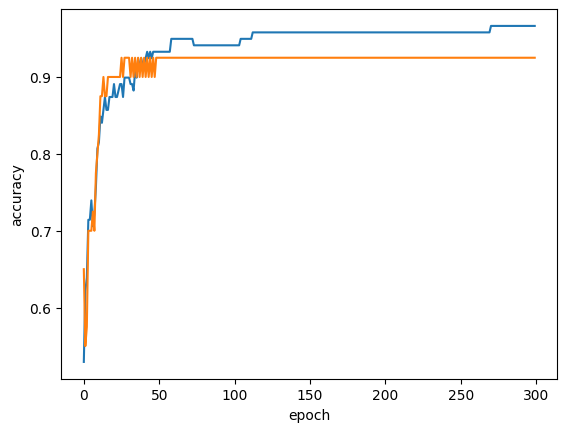

In [ ]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 내가 분기 for문을 여러 번 실행하는 바람에 반복 횟수가 1200회가 되어 정확한 확인이 어렵지만, 대략 100회의 에포크가 적절해 보임

In [ ]:
# 반복 횟수를 100에 맞추고 모델을 재훈련 (100 epoch)
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

'''
SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춘다!
tol 매개변수에서 향상될 최솟값을 지정한다.
매개변수 값이 None이면 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 하는 것

최종 점수가 매우 좋아 보인다.
훈련 세트와 세스트 세트에서의 정확도 점수가 비교적 높게 나왔으며,
확률적 경사 하강법을 사용한 생선 분류 문제도 성공적으로 해결함

사이킷런에는 확률적 경사 하강법을 사용한 회귀 모델도 존재한다!
SGDRegressor가 바로 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공하며,
사용 방법은 SGDClassifier와 동일하다.
'''

0.957983193277311
0.925


'\nSGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춘다!\ntol 매개변수에서 향상될 최솟값을 지정한다.\n매개변수 값이 None이면 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 하는 것\n\n최종 점수가 매우 좋아 보인다.\n훈련 세트와 세스트 세트에서의 정확도 점수가 비교적 높게 나왔으며,\n확률적 경사 하강법을 사용한 생선 분류 문제도 성공적으로 해결함\n\n사이킷런에는 확률적 경사 하강법을 사용한 회귀 모델도 존재한다!\nSGDRegressor가 바로 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공하며,\n사용 방법은 SGDClassifier와 동일하다.\n'

In [ ]:
'''
SGDClassifier의 loss 매개변수의 기본값음 'hinge'이다.
힌지 손실(hinge loss)은 서포트 벡터 머신(support vector machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.
SGDClassifier는 여러 종류의 손실 함수를 loss 매개변수에 저장하여 다양한 머신러닝 알고리즘을 지원한다.
간단한 예로 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해보겠다.
'''

"\nSGDClassifier의 loss 매개변수의 기본값음 'hinge'이다.\n힌지 손실(hinge loss)은 서포트 벡터 머신(support vector machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.\nSGDClassifier는 여러 종류의 손실 함수를 loss 매개변수에 저장하여 다양한 머신러닝 알고리즘을 지원한다.\n간단한 예로 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해보겠다.\n"

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [ ]:
'''
이번 장에서 확률적 경사 하강법을 사용해 점진적으로 학습하는 로지스틱 회귀 모델을 훈련했다.
다시 정리하자면, 확률적 경사 하강법은 손실 함수라는 산을 정의하고 가장 가파른 경사를 따라
조금씩 내려오는 알고리즘이다. (정확히는 모델 알고리즘이 아니라 최적화를 위한 계산법임)
충분히 반복하여 훈련하면 훈련 세트에서 높은 점수를 얻는 모델을 만들 수 있다.
하지만 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어들 것이다.

요즘은 대량의 데이터를 이용해 문제를 해결해야 하는 일이 매우 흔해, 이 데이터를 한 번에 컴퓨터 메모리에 읽을 수 없다.
따라서 점진적 학습법이 필요해졌고, 확률적 경사 하강법이 바로 이 문제를 해결하는 key이다.
7장에서 신경망을 다룰 때 좀 더 자세히 다루도록 하겠다.

지금까지 회귀와 분류에 널리 사용되는 다양한 알고리즘을 배웠다.
최근접 이웃, 선형 회귀, 릿지, 라쏘, 로지스틱 회귀, 확률적 경사 하강법 등이다.
이 알고리즘들은 실전에서 널리 사용되지만 최고는 아니다.
신경망 알고리즘을 제외하고 머신러닝에서 가장 뛰어난 성능을 내는 알고리즘이 존재하는데, 다음 장에서 이를 배울 예정이다.
'''

'\n이번 장에서 확률적 경사 하강법을 사용해 점진적으로 학습하는 로지스틱 회귀 모델을 훈련했다.\n다시 정리하자면, 확률적 경사 하강법은 손실 함수라는 산을 정의하고 가장 가파른 경사를 따라\n조금씩 내려오는 알고리즘이다. (정확히는 모델 알고리즘이 아니라 최적화를 위한 계산법임)\n충분히 반복하여 훈련하면 훈련 세트에서 높은 점수를 얻는 모델을 만들 수 있다.\n하지만 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어들 것이다.\n\n요즘은 대량의 데이터를 이용해 문제를 해결해야 하는 일이 매우 흔해, 이 데이터를 한 번에 컴퓨터 메모리에 읽을 수 없다.\n따라서 점진적 학습법이 필요해졌고, 확률적 경사 하강법이 바로 이 문제를 해결하는 key이다.\n7장에서 신경망을 다룰 때 좀 더 자세히 다루도록 하겠다.\n\n지금까지 회귀와 분류에 널리 사용되는 다양한 알고리즘을 배웠다.\n최근접 이웃, 선형 회귀, 릿지, 라쏘, 로지스틱 회귀, 확률적 경사 하강법 등이다.\n이 알고리즘들은 실전에서 널리 사용되지만 최고는 아니다.\n신경망 알고리즘을 제외하고 머신러닝에서 가장 뛰어난 성능을 내는 알고리즘이 존재하는데, 다음 장에서 이를 배울 예정이다.\n'